In [1]:
# Importing startung libraries
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Setting random seed
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
# Setting datapath for all sets
train_datapath = r'C:\Users\acer\DL Training\Face Mask Detection\dataset\train'
valid_datapath = r'C:\Users\acer\DL Training\Face Mask Detection\dataset\validation'
test_datapath = r'C:\Users\acer\DL Training\Face Mask Detection\dataset\test'

In [3]:
# Importing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initializing ImageDataGenerator objects for all sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# Creating image generators from directory
train_generator = train_datagen.flow_from_directory(train_datapath, target_size=(128,128), batch_size=20, class_mode='binary')
valid_generator = train_datagen.flow_from_directory(valid_datapath, target_size=(128,128), batch_size=20, class_mode='binary')
test_generator = train_datagen.flow_from_directory(test_datapath, target_size=(128,128), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [5]:
# Importing VGG19 model to create convolutional base
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))
conv_base.summary()

80142336/80134624 [==============================] - 29s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_____________________________________________________________

In [6]:
# To not train already trained parameters
conv_base.trainable = False

In [7]:
# Importing required modules
from tensorflow.keras import layers
from tensorflow.keras import models

In [8]:
# Creating a Sequential model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
# Compiling the created model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

In [10]:
# To save the best model state
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
# Training the model with trained & validatiion dataset
model_history = model.fit(train_generator, steps_per_epoch=500, epochs=10, validation_data=valid_generator, validation_steps=40,
                          callbacks=[model_checkpoint, early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 40 steps
Epoch 1/10
500/500 [==============================] - 808s 2s/step - loss: 0.2499 - accuracy: 0.9140 - val_loss: 0.1476 - val_accuracy: 0.9550
Epoch 2/10
500/500 [==============================] - 773s 2s/step - loss: 0.1374 - accuracy: 0.9504 - val_loss: 0.1335 - val_accuracy: 0.9525
Epoch 3/10
500/500 [==============================] - 1585s 3s/step - loss: 0.1122 - accuracy: 0.9587 - val_loss: 0.1066 - val_accuracy: 0.9538
Epoch 4/10
500/500 [==============================] - 873s 2s/step - loss: 0.1023 - accuracy: 0.9634 - val_loss: 0.0943 - val_accuracy: 0.9625
Epoch 5/10
500/500 [==============================] - 871s 2s/step - loss: 0.0935 - accuracy: 0.9668 - val_loss: 0.0977 - val_accuracy: 0.9663
Epoch 6/10
500/500 [==============================] - 865s 2s/step - loss: 0.0873 - accuracy: 0.9677 - val_loss: 0.1132 - val_accuracy: 0.9625
Epoch 7/10
500/500 [============================

In [12]:
model_eval = model.evaluate(test_generator, steps=50)

  ...
    to  
  ['...']
50/50 [==============================] - 68s 1s/step - loss: 0.0872 - accuracy: 0.9637


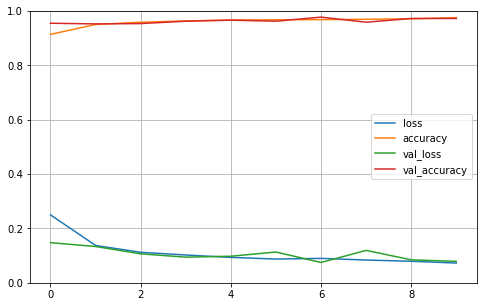

In [13]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model_eval[1:]

[0.96370965]